In [2]:
# importações EDA

import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
# Carregar dataset

df = pd.read_csv('../data/processed/processed_data.csv')

In [4]:
df.head()

,syndrome_id,subject_id,image_id,0,1,2,3,4,5,6,...,310,311,312,313,314,315,316,317,318,319
0,300000082,595,3543,-0.037180,1.741486,1.206103,-0.451453,-0.736373,1.705392,0.738040,...,1.783927,1.587222,-1.522482,-3.935935,0.007990,0.668852,1.129786,0.097900,-0.768619,0.271600
1,300000082,2638,1633,2.424995,0.179920,2.950324,0.379930,-0.158152,-0.238334,-0.436916,...,-0.665296,0.367323,-2.437823,-2.704050,1.696490,-0.471431,2.529153,1.107004,-3.214602,-1.450313
2,300000082,734490,742992,-1.789331,-0.216211,0.434315,-0.552323,-1.065345,1.817165,0.006342,...,0.439080,0.861753,-0.544255,-0.486401,-2.228478,0.964719,-0.297413,-0.623660,-0.208614,0.236617
3,300000082,2770,1812,-1.143693,-0.714621,0.319488,0.455682,1.571120,-0.837411,0.726402,...,-0.414648,-0.121709,-1.838737,-0.405826,0.190536,0.651180,0.539327,-0.103917,-3.094141,0.867695
4,300000082,2642,1801,0.814171,1.327491,0.847285,-0.212331,-0.161848,0.468158,-1.385634,...,-0.321441,0.560821,-4.187195,-0.589926,0.104791,1.157607,1.382157,-0.184572,-2.582998,0.356301


In [5]:
# Informações básicas
print(df.info())

# valores faltantes
print("Missing Values:\n", df.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Columns: 323 entries, syndrome_id to 319
dtypes: float64(320), int64(3)
memory usage: 2.8 MB
None
Missing Values:
 0


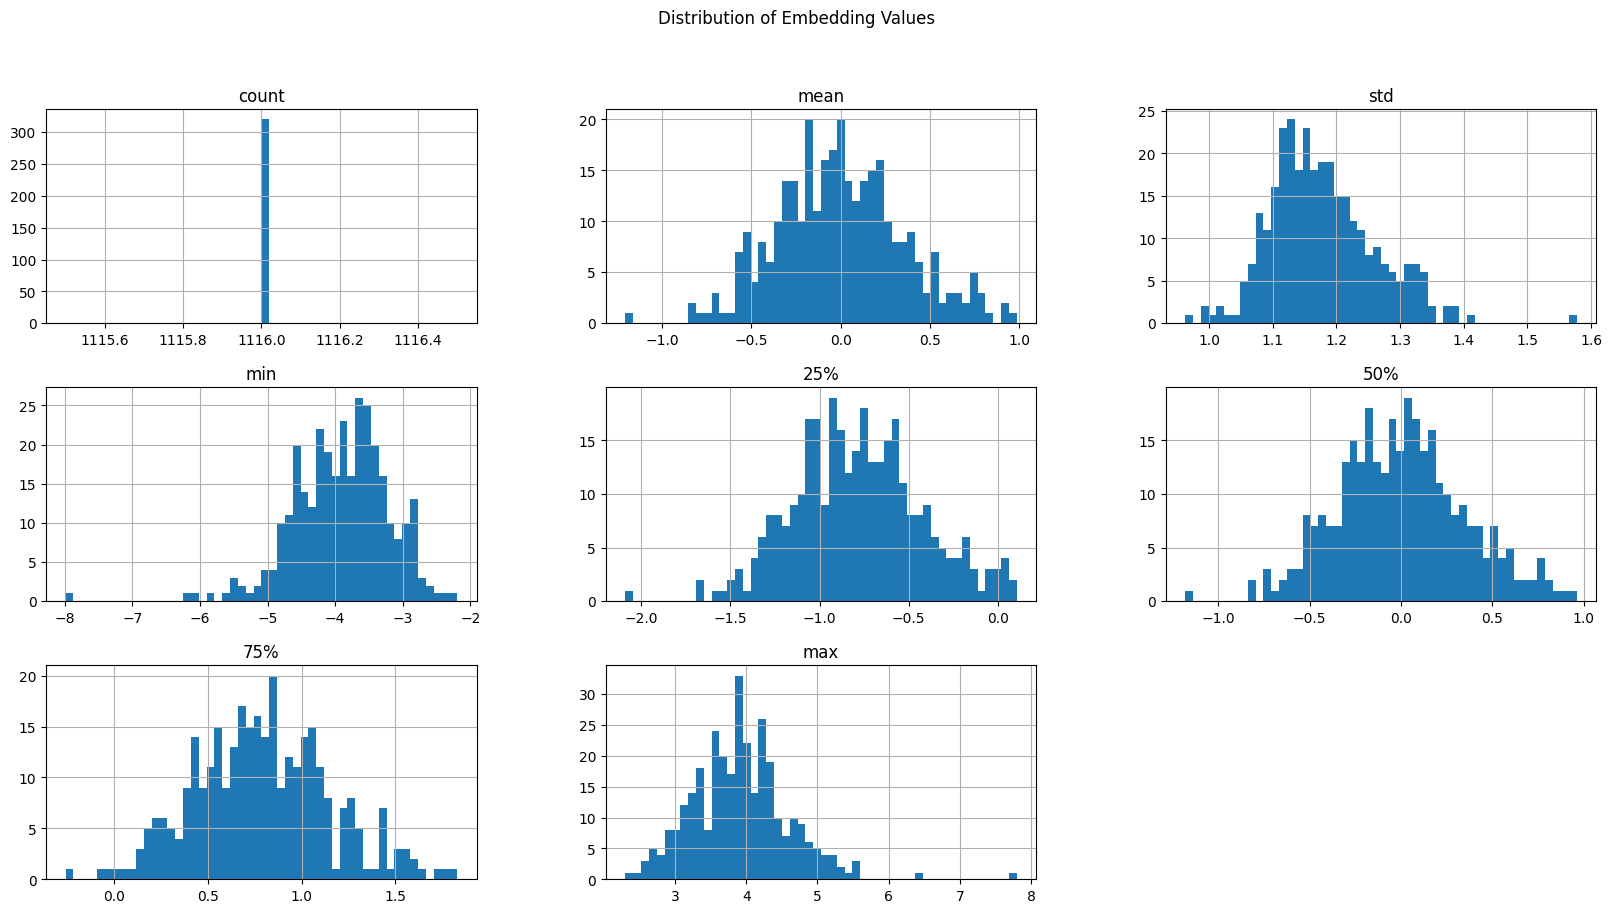

In [6]:
# Distribuição de valores nos embeddings

df.iloc[:, 3:].describe().T.hist(bins=50, figsize=(20, 10))
plt.suptitle("Distribution of Embedding Values")
plt.show()


In [7]:
# Estatísticas básicas
print(f"Total Samples: {len(df)}")
print(f"Number of Unique Syndromes: {df['syndrome_id'].nunique()}")

df['syndrome_id'] = df['syndrome_id'].astype(str)

# Contagem das síndromes
syndrome_counts = df['syndrome_id'].value_counts().reset_index()
syndrome_counts.columns = ['syndrome_id', 'count']

fig = px.bar(syndrome_counts, 
             x='syndrome_id', 
             y='count', 
             labels={'syndrome_id': 'Syndrome ID', 'count': 'Count'},
             title="Distribution of Syndrome IDs",
             color='count',
             color_continuous_scale='viridis')

fig.show()


Total Samples: 1116
Number of Unique Syndromes: 10


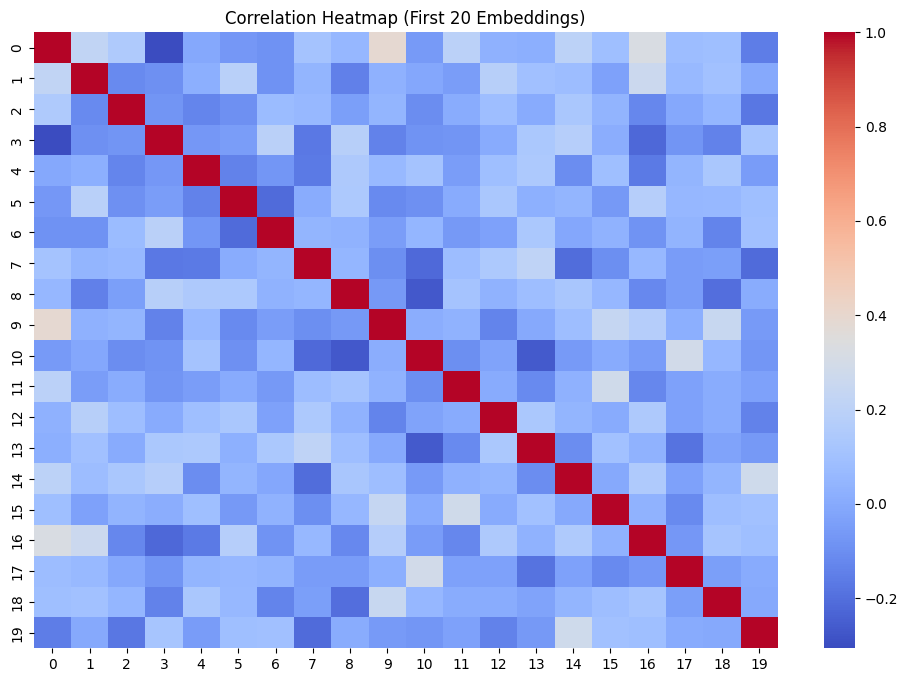

In [8]:

# Correlação entre os primeiros 20 embeddings

corr_matrix = df.iloc[:, 3:23].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.title("Correlation Heatmap (First 20 Embeddings)")
plt.show()


- (Correlação Perfeita = 1.0)
- A maioria das colunas apresenta baixa correlação entre si, isso é bom. Indica que as dimensões dos embeddings estão pegando diferentes aspectos das imagens

In [9]:
# Análise de variância

variances = df.iloc[:, 3:].var()
low_variance_features = variances[variances < 0.01].index
print(f"Low Variance Features: {len(low_variance_features)}")

# Isso serve para verificar se algum embedding tem variância zero ou baixa, pois isso pode indicar que não contribui para o modelo.


Low Variance Features: 0


In [ ]:
# Normalizar os embeddings
from sklearn.preprocessing import StandardScaler

# Aplicando a normalização apenas nos embeddings (a partir da 3ª)
scaler = StandardScaler()
df.iloc[:, 3:] = scaler.fit_transform(df.iloc[:, 3:])

print("Embeddings normalized successfully (Z-score normalization applied).")

Embeddings normalized successfully (Z-score normalization applied).


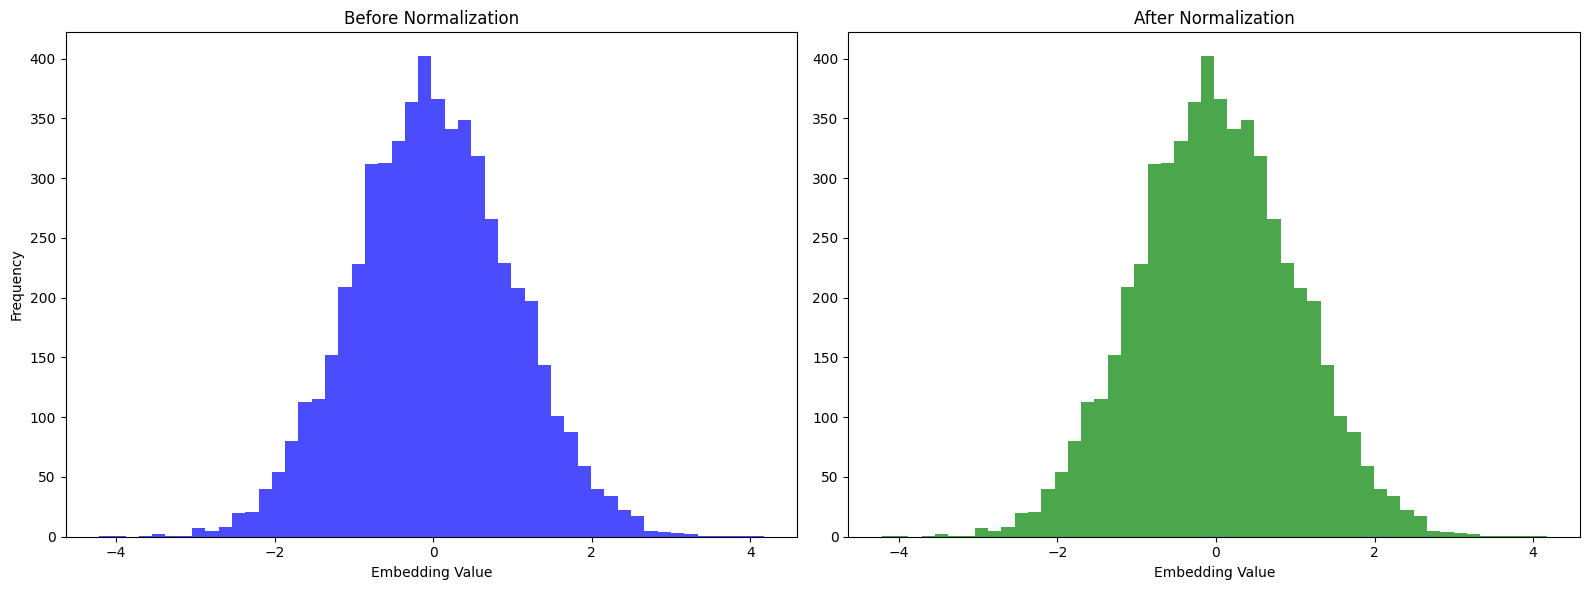

In [11]:
# Histogramas antes e depois da normalização
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Antes da normalização (plotando as primeiras 5 colunas)
df_original = df.copy()  # backup
axs[0].hist(df_original.iloc[:, 3:8].values.flatten(), bins=50, color='blue', alpha=0.7)
axs[0].set_title('Before Normalization')
axs[0].set_xlabel('Embedding Value')
axs[0].set_ylabel('Frequency')

# Depois da normalização
axs[1].hist(df.iloc[:, 3:8].values.flatten(), bins=50, color='green', alpha=0.7)
axs[1].set_title('After Normalization')
axs[1].set_xlabel('Embedding Value')

plt.tight_layout()
plt.show()


In [12]:
print("Após normalização:")
print("Média:", df.iloc[:, 3:].mean().mean())
print("Desvio Padrão:", df.iloc[:, 3:].std().mean())


Após normalização:
Média: -1.9498540575854e-18
Desvio Padrão: 1.0004483299933822


In [13]:
# Salvando a base normalizado

df.to_csv('../data/processed/normalized_data.csv', index=False)
print("Salvo!")


Salvo!
